In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
# sklearn.cross_validation is now sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
mask_data = pd.read_csv('C:\Kusuma\DXC AI-ML Course\DataSets\Insofe Datasets\Dataset4\data_train.csv')
mask_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,19805.000000,19805.000000,19805.000000,19805.000000,19805.000000,19805.000000,19805.000000,19805.000000,19805.000000,19805.000000,...,19805.000000,19805.000000,19805.000000,19805.000000,19805.000000,19805.000000,19805.000000,19805.000000,1.980500e+04,19805.000000
mean,75847.628074,-1108.083211,33.555971,103.503476,73.296464,118.198214,2.932634,5.073734,0.536949,0.765743,...,12.808781,2.875303,22.509152,15.463984,20.448713,2.583302,65.398982,53.664407,1.148312e+05,0.091290
std,43704.867512,33311.509459,13.051363,1899.254687,349.740142,535.804476,72.638749,112.317318,24.860556,34.593382,...,679.469747,192.520603,1294.613332,870.190487,961.517489,222.376009,3377.657815,3082.762054,1.131974e+05,0.288028
min,3.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38062.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.702216e+04,0.000000
50%,75936.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.056963e+05,0.000000
75%,113550.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.184206e+05,0.000000
max,151808.000000,223.000000,104.000000,135000.000000,12888.030000,16086.060000,6300.690000,7209.930000,1800.000000,3000.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,99047.250000,24650.010000,397884.300000,397884.300000,6.942616e+06,1.000000


In [3]:
x_md = mask_data.iloc[:, ~mask_data.columns.isin(['ID', 'TARGET'])]
#x_md.head()
y_md = mask_data.iloc[:,mask_data.columns.isin(['TARGET'])]
#y_md.head()
x_md.shape, y_md.shape

((19805, 369), (19805, 1))

In [4]:
df=x_md
model = RandomForestClassifier()
df=pd.get_dummies(df)
model.fit(df,np.ravel(y_md))

C:\Users\kusumanrk\Anaconda3-7Apr\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

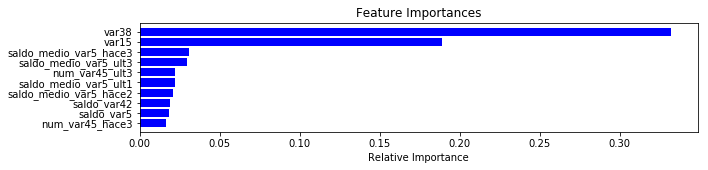

In [5]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
f, ax = plt.subplots(figsize=(10,2)) 
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [6]:
feature = SelectFromModel(model,max_features=10)
Fit = feature.fit_transform(df, np.ravel(y_md))
Fit.shape

(19805, 10)

In [7]:
fit_md = pd.DataFrame(Fit)
fit_md.shape, fit_md.head()

((19805, 10),
       0        1    2     3     4         5     6         7         8  \
 0  23.0     90.0  0.0   0.0   9.0     90.00  5.82     90.00     61.95   
 1  28.0     12.0  0.0   0.0   0.0     12.00  6.54     12.00     10.17   
 2  23.0      0.0  0.0   3.0   3.0      0.00  0.00      0.00      0.00   
 3  46.0  36009.0  0.0   0.0   0.0  27879.96  1.80  36009.00  21296.91   
 4  57.0   1215.0  0.0  12.0  18.0     12.24  0.00    750.48    381.36   
 
             9  
 0  111616.770  
 1  117310.979  
 2  153711.960  
 3  117310.979  
 4  128369.460  )

In [8]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(fit_md, np.ravel(y_md))
np.bincount(y_train),X_train.shape, y_train.shape
#X_train,X_test,y_train,y_test=train_test_split(fit_md,y_md,test_size=0.25,random_state=0)

(array([17997, 17997], dtype=int64), (35994, 10), (35994,))

In [9]:
X_tr,X_test,y_tr,y_test=train_test_split(X_train, y_train,test_size=0.25,random_state=0)
X_tr.shape,X_test.shape,y_tr.shape,y_test.shape

((26995, 10), (8999, 10), (26995,), (8999,))

In [10]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000, verbose=1)
lr.fit(X_tr,np.ravel(y_tr))
y_pred=lr.predict(X_tr)
cf_matrix = metrics.confusion_matrix(y_tr, y_pred)
print(cf_matrix)
print("Accuracy:",metrics.accuracy_score(y_tr, y_pred))
print("Precision:",metrics.precision_score(y_tr, y_pred))
print("Recall:",metrics.recall_score(y_tr, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[ 6324  7230]
 [ 2290 11151]]
Accuracy: 0.6473421003889609
Precision: 0.6066590501060878
Recall: 0.8296257718919723


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


In [11]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000, verbose=1,n_jobs=-1)
lr.fit(X_tr,np.ravel(y_tr))
y_pred=lr.predict(X_test)
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[[2130 2313]
 [ 822 3734]]
Accuracy: 0.6516279586620736
Precision: 0.6174962791466843
Recall: 0.8195785776997366


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s finished


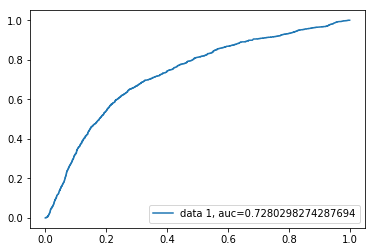

In [12]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [13]:
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [14]:
#Stacking - an Ensemble method
np.random.seed(1)
X, y = X_tr[:, 1:3], y_tr
#X, y = X_tr.data[:, 1:3], y_tr
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(n_estimators=100,random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression(solver='lbfgs')
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

Accuracy: 0.66 (+/- 0.07) [KNN]
Accuracy: 0.80 (+/- 0.00) [Random Forest]
Accuracy: 0.52 (+/- 0.00) [Naive Bayes]
Accuracy: 0.79 (+/- 0.01) [Stacking Classifier]


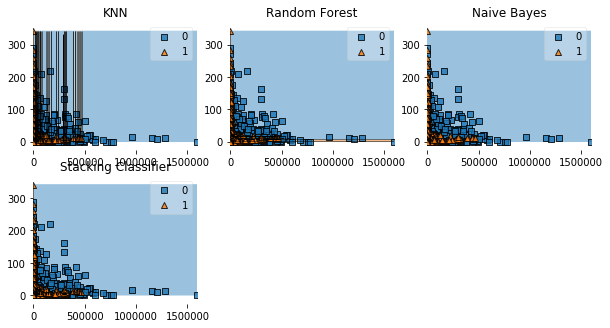

In [15]:
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(3, 3)
grid = itertools.product([0,1,2],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print( "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

plt.show()

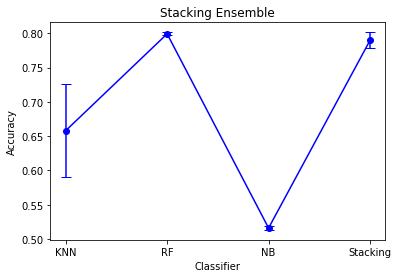

In [16]:
#plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

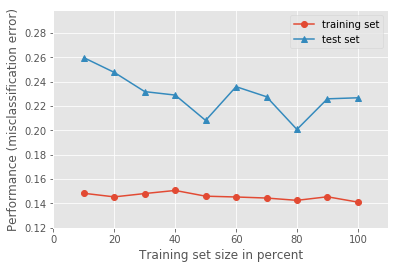

In [17]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()

In [18]:
indices
imp_cols = x_md.columns.get_values()[indices]
imp_cols

array(['num_var45_hace3', 'saldo_var5', 'saldo_var42',
       'saldo_medio_var5_hace2', 'saldo_medio_var5_ult1',
       'num_var45_ult3', 'saldo_medio_var5_ult3',
       'saldo_medio_var5_hace3', 'var15', 'var38'], dtype=object)

In [19]:

test_data =  pd.read_csv('C:\Kusuma\DXC AI-ML Course\DataSets\Insofe Datasets\Dataset4\data_test.csv')
test_data = test_data[imp_cols]                   #.iloc[:, column_index(test_data, imp_cols)]
test_data


,num_var45_hace3,saldo_var5,saldo_var42,saldo_medio_var5_hace2,saldo_medio_var5_ult1,num_var45_ult3,saldo_medio_var5_ult3,saldo_medio_var5_hace3,var15,var38
0,9,30.00,30.00,30.00,30.00,9,4471.47,13354.38,47,117310.979
1,3,406.11,406.11,1306.11,508.74,27,907.44,0.00,35,117310.979
2,18,1261.95,1261.95,170.37,535.23,576,246.24,33.09,34,460580.160
3,0,3.00,3.00,3.00,3.00,0,2.16,0.48,24,34955.700
4,12,0.00,0.00,300.03,0.00,18,0.00,406.47,31,56446.020
5,0,0.00,0.00,0.00,0.00,0,0.00,0.00,23,91419.240
6,0,3.00,3.00,3.00,3.00,0,2.07,0.21,30,119542.260
7,12,9.00,15027.66,529.02,9.00,48,179.43,0.30,40,96136.500
8,0,3.00,3.00,3.00,3.00,0,2.25,0.72,23,37332.780
9,3,0.00,0.00,0.00,0.00,3,0.00,0.00,30,45669.630


In [20]:
#test_data =  pd.read_csv('C:\Kusuma\DXC AI-ML Course\DataSets\Insofe Datasets\Dataset4\data_test.csv')
#scores = cross_val_score(clf, X_tr, y_tr, cv=3, scoring='accuracy')
#    print ('Accuracy: %.2f (+/- %.2f) [%s]' %(scores.mean(), scores.std(), label))
lr = LogisticRegression(solver='lbfgs', max_iter=10000, verbose=1,n_jobs=-1)
lr.fit(X_tr,np.ravel(y_tr))
#x_tst = test_data.iloc[:, test_data.columns]
y_pred=lr.predict(test_data)
y_pred = pd.DataFrame(y_pred)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished


In [21]:
np.unique(y_pred,return_counts=True)

(array([0, 1], dtype=int64), array([12988,   215], dtype=int64))

In [22]:
#cf_matrix = metrics.confusion_matrix(y_tr, y_pred)
#print(cf_matrix)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

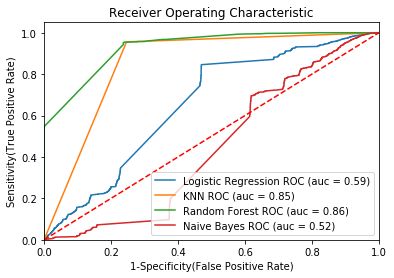

In [23]:
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs'),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors=1),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100,random_state=1),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB()
}
   
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X, y) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (auc = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display